In [2]:
import SimpleITK as sitk
import numpy as np 
import matplotlib.pyplot as plt

from mrio import dicom_reader,seg_loader
from process import extract_and_resample_labels
from models.roi import create_rois, ROI  # Import create_rois and ROI class
from fitting.relaxation_fitting import RelaxationFittingModel
from fitting.analysis import compute_roi_statistics
from visualization.mapplot import (
    show_slice,
    show_mask,
    show_parameter_map_with_rois,
    show_rois_with_mean,
)

In [2]:
dicom_folder = '/home/gizmoo/Desktop/MRTC_Lehre_Praktikum_Versuch_01____20240801_162626097/2_se_mc'
seg_path = '/home/gizmoo/Segs/goodSeg.nii.gz'

In [3]:
images, echos = dicom_reader.read_multiple_echos_one_folder(dicom_folder)
print("Echo Times:", echos)
print(f"Segmentation Size: {images[0].GetSize()}")


Echo Times: [13.0, 26.0, 39.0, 52.0, 65.0, 78.0, 91.0, 104.0]
Segmentation Size: (256, 256, 22)


In [4]:
seg = seg_loader.load_segmentation_nii(seg_path)
print(f"Segmentation Size: {seg.GetSize()}")

Segmentation Size: (256, 256, 22)


In [5]:
label_values = list(range(1,7))
rois = create_rois(seg, images[0], label_values)
print(f"Number of ROIs Created: {len(rois)}")


Number of ROIs Created: 6


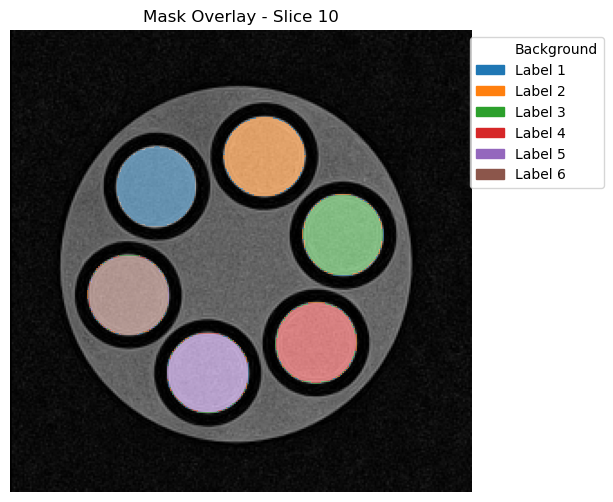

In [6]:
slice_index = 10  # Adjust based on your data
show_mask(
    image=images[0],
    rois=rois,
    slice_index=slice_index,
    title=f"Mask Overlay - Slice {slice_index}",
    alpha=0.5
)

In [7]:
relaxation = 'T2'
fitting_model = RelaxationFittingModel(time_values= echos,model_type=relaxation)

In [8]:
# Fit T2 curve for each ROI
for roi in rois:
    print(f"Fitting T2 curve for Label {roi.label_id}...")
    roi.fit(images=images,fitting_model= fitting_model)
    roi.compute_statistics()
    print(f"Label {roi.label_id} - Mean T2: {roi.mean:.2f} ms, Std T2: {roi.std:.2f} ms")

Fitting T2 curve for Label 1...
Label 1 - Mean T2: 38.25 ms, Std T2: 2.61 ms
Fitting T2 curve for Label 2...
Label 2 - Mean T2: 48.43 ms, Std T2: 3.14 ms
Fitting T2 curve for Label 3...
Label 3 - Mean T2: 70.13 ms, Std T2: 4.23 ms
Fitting T2 curve for Label 4...
Label 4 - Mean T2: 62.67 ms, Std T2: 5.60 ms
Fitting T2 curve for Label 5...
Label 5 - Mean T2: 76.74 ms, Std T2: 7.54 ms
Fitting T2 curve for Label 6...
Label 6 - Mean T2: 108.14 ms, Std T2: 11.93 ms


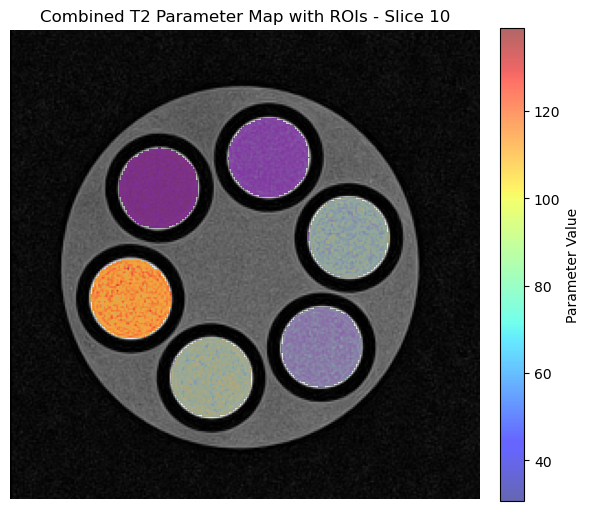

In [9]:
# Visualize the combined T2 Parameter Map with all ROIs
show_parameter_map_with_rois(
    image=images[0],
    rois=rois,
    slice_index=slice_index,  # Adjust based on your data
    title=f"Combined T2 Parameter Map with ROIs - Slice {slice_index}",
    cmap_param='jet',       # Choose an appropriate colormap
    alpha_param=0.6,       # Adjust transparency as needed
    cmap_roi='autumn',     # Choose an appropriate colormap for ROIs
    alpha_roi=0.3,         # Adjust transparency as needed
    save_path=None# Ensure 'visualization/' exists
)

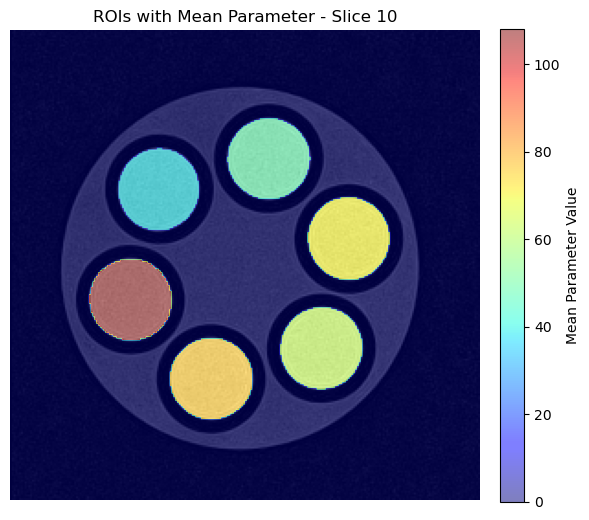

In [ ]:
show_rois_with_mean(
    image=images[0],
    rois=rois,
    slice_index=slice_index,
    title=f"ROIs with Mean Parameter - Slice {slice_index}",
    cmap= 'jet',
    alpha=0.5,
    save_path=None
)